# Literature Mapper Vignette

**v2.1.6** | December 2025 | [GitHub](https://github.com/jeremiahbohr/literature-mapper)

 

## Quick Reference Card

| Task | Method | Module |
|:-----|:-------|:------:|
| **Process PDFs** | `mapper.process_new_papers()` | [1](#1-setup--first-run) |
| **View all papers** | `mapper.get_all_analyses()` | [2](#2-understanding-your-corpus) |
| **Keyword search** | `mapper.search_papers(column, query)` | [3](#3-search--retrieval) |
| **Semantic search** | `mapper.search_corpus(query, semantic=True)` | [3](#3-search--retrieval) |
| **Fetch citations** | `mapper.update_citations()` | [4](#4-citation--influence-analysis) |
| **Find missing papers** | `GhostHunter.find_bibliographic_ghosts()` | [5](#5-gap-detection-ghost-hunting) |
| **Concept timeline** | `mapper.get_concept_timeline()` | [6](#6-temporal-analysis) |
| **Build genealogy** | `mapper.build_genealogy()` | [7](#7-intellectual-genealogy) |
| **Synthesize answer** | `mapper.synthesize_answer(question)` | [8](#8-ai-synthesis-agents) |
| **Validate hypothesis** | `mapper.validate_hypothesis(claim)` | [8](#8-ai-synthesis-agents) |
| **Export GEXF** | `export_to_gexf(corpus_path, output_path, mode)` | [9](#9-export--visualization) |

---

## Navigation

| Module | Purpose |
|:-------|:--------|
| [**1. Setup & First Run**](#1-setup--first-run) | Initialize mapper, process PDFs, verify environment |
| [**2. Understanding Your Corpus**](#2-understanding-your-corpus) | Database schema, statistics, knowledge graph structure |
| [**3. Search & Retrieval**](#3-search--retrieval) | Keyword vs. semantic search, enhanced retrieval |
| [**4. Citation & Influence Analysis**](#4-citation--influence-analysis) | OpenAlex enrichment, hub identification, analytics |
| [**5. Gap Detection (Ghost Hunting)**](#5-gap-detection-ghost-hunting) | Missing papers, missing authors |
| [**6. Temporal Analysis**](#6-temporal-analysis) | Concept timelines, trends, era detection |
| [**7. Intellectual Genealogy**](#7-intellectual-genealogy) | Argument evolution, contradictions, relationship types |
| [**8. AI Synthesis Agents**](#8-ai-synthesis-agents) | Research synthesis, hypothesis validation |
| [**9. Export & Visualization**](#9-export--visualization) | CSV, GEXF, Gephi workflows |
| [**Appendix A: Method Reference**](#appendix-a-method-reference) | Complete API documentation |
| [**Appendix B: CLI Reference**](#appendix-b-cli-reference) | Command-line interface |

---

# 1: Setup & First Run

> **TL;DR**: Initialize `LiteratureMapper` with a corpus path, call `process_new_papers()`, and you're ready.

---

### Prerequisites

| Requirement | Details |
|:------------|:--------|
| Python | 3.10 or newer |
| API Key | `GEMINI_API_KEY` environment variable ([get one](https://aistudio.google.com/)) |
| Corpus | A folder containing PDF files |
| Install | `pip install literature-mapper` |

**Cost estimate**: ~$0.50 USD for 50 papers via Gemini API.

In [2]:
# Verify environment
import os
import warnings
warnings.filterwarnings('ignore')

if not os.getenv('GEMINI_API_KEY'):
    raise EnvironmentError(
        "GEMINI_API_KEY not found.\n"
        "Set it before running: export GEMINI_API_KEY='your_key'"
    )
print("Gemini API key configured")

Gemini API key configured


In [3]:
from pathlib import Path
from literature_mapper import LiteratureMapper

# Define your corpus location
CORPUS_PATH = Path("./vignette_library")

# Initialize (creates corpus.db if needed)
mapper = LiteratureMapper(
    corpus_path=str(CORPUS_PATH),
    model_name="gemini-3-flash-preview"
)

### Processing PDFs

Processing is incremental, and previously processed PDFs are skipped automatically.

In [4]:
result = mapper.process_new_papers(recursive=True)

print(f"Processed: {result.processed}")
print(f"Skipped (already in DB): {result.skipped}")
print(f"Failed: {result.failed}")

Processing papers: 100%|██████████| 51/51 [55:21<00:00, 65.12s/pdf]

Processed: 50
Skipped (already in DB): 1
Failed: 0


**Common issues**:
- Scanned PDFs without OCR → no extractable text
- Password-protected files → extraction fails
- Corrupted PDF structure → partial or no data

<details>
<summary><strong>CLI equivalent</strong></summary>

```bash
literature-mapper process ./vignette_library --recursive
```
</details>

---

# 2: Understanding Your Corpus

> **TL;DR**: Explore database schema, view statistics, and understand the knowledge graph structure.

---

### 2.1 Database Schema

Literature Mapper stores everything in SQLite (`corpus.db`). Key tables:

| Table | Description | Key Columns |
|:------|:------------|:------------|
| `papers` | Core metadata | `id`, `title`, `year`, `core_argument`, `methodology` |
| `authors` | Unique author names | `id`, `name`, `canonical_name` |
| `concepts` | Extracted key terms | `id`, `name`, `canonical_name` |
| `paper_authors` | Many-to-many link | `paper_id`, `author_id` |
| `paper_concepts` | Many-to-many link | `paper_id`, `concept_id` |
| `kg_nodes` | Knowledge graph nodes | `id`, `type`, `label`, `vector` (embedding) |
| `kg_edges` | Relationships | `source_id`, `target_id`, `relation` |
| `citations` | OpenAlex data | `paper_id`, `cited_doi`, `cited_title` |
| `intellectual_edges` | Genealogy relationships | `source_paper_id`, `target_paper_id`, `relation_type` |

### 2.2 Corpus Statistics

In [5]:
stats = mapper.get_statistics()

print(f"Papers:   {stats.total_papers:>5}")
print(f"Authors:  {stats.total_authors:>5}")
print(f"Concepts: {stats.total_concepts:>5}")

Papers:      49
Authors:    107
Concepts:   198


In [6]:
# Full DataFrame of all papers
papers_df = mapper.get_all_analyses()
papers_df[['title', 'year', 'authors', 'journal']].head()

,title,year,authors,journal
0,Multilevel longitudinal analysis of social net...,2023,"Johan Koskinen,Tom A.B. Snijders",Journal of the Royal Statistical Society Serie...
1,Social network analysis of Twitter interaction...,2023,"Austin P. Logan,Phillip M. LaCasse,Brian J. Lu...",Social Network Analysis and Mining
2,Influence of augmented humans in online intera...,2019,"Massimo Stella,Marco Cristoforetti,Manlio De D...",PLoS ONE
3,Change we can believe in: Comparing longitudin...,2018,"Per Block,Johan Koskinen,James Hollway,Christi...",Social Networks
4,Experimental evidence for tipping points in so...,2018,"Damon Centola,Joshua Becker,Devon Brackbill,An...",Science


### 2.3 Knowledge Graph Structure

The KG contains typed nodes (concepts, findings, methods, limitations) with semantic edges.

| Node Type | Description |
|:----------|:------------|
| `paper` | The paper itself |
| `author` | Paper authors |
| `finding` | Key results or claims |
| `method` | Research methods |
| `concept` | Important terms |
| `limitation` | Acknowledged weaknesses |
| `hypothesis` | Proposed theories |

In [7]:
from literature_mapper.database import get_db_session, KGNode, KGEdge
from sqlalchemy import func

with get_db_session(CORPUS_PATH) as session:
    node_counts = (
        session.query(KGNode.type, func.count(KGNode.id))
        .group_by(KGNode.type)
        .order_by(func.count(KGNode.id).desc())
        .all()
    )
    edge_count = session.query(KGEdge).count()

print("Node Types:")
for node_type, count in node_counts:
    print(f"  {node_type:15s} {count:>5}")
print(f"\nTotal edges: {edge_count:,}")

Node Types:
  concept           413
  finding           184
  method            124
  author            124
  limitation        119
  institution       100
  hypothesis         76
  source             49
  paper              49

Total edges: 2,133


### 2.4 Temporal Distribution

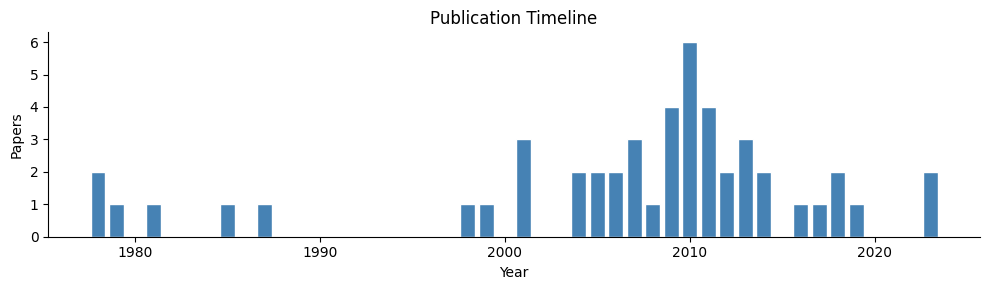

In [8]:
import matplotlib.pyplot as plt
from literature_mapper.analysis import CorpusAnalyzer

analyzer = CorpusAnalyzer(CORPUS_PATH)
year_dist = analyzer.get_year_distribution()

if not year_dist.empty:
    fig, ax = plt.subplots(figsize=(10, 3))
    ax.bar(year_dist['year'], year_dist['count'], color='steelblue', edgecolor='white')
    ax.set_xlabel('Year')
    ax.set_ylabel('Papers')
    ax.set_title('Publication Timeline')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()
    plt.show()

---

# 3: Search & Retrieval

> **TL;DR**: Use `search_papers()` for keywords, `search_corpus(semantic=True)` for meaning-based search.

---

### 3.1 Keyword Search

In [9]:
# Case-insensitive substring match on a specific column
survey_papers = mapper.search_papers(column='methodology', query='survey')

print(f"Found {len(survey_papers)} papers using survey methodology:")
for _, row in survey_papers.head(3).iterrows():
    print(f"  • {row['title'][:60]}... ({row['year']})")

Found 6 papers using survey methodology:
  • Weak ties and the core discussion network: Why people regula... (2013)
  • Chains of Affection: The Structure of Adolescent Romantic an... (2004)
  • Structural Holes and Good Ideas... (2004)


### 3.2 Semantic Search

Semantic search uses embedding vectors to find content by **meaning**, not exact keywords.

In [10]:
results = mapper.search_corpus(
    query="influence of social ties on information diffusion",
    semantic=True,
    limit=5
)

for r in results:
    print(f"[{r['match_score']:.3f}] {r['title']} ({r['year']})")

[0.608] Multilevel longitudinal analysis of social networks (2023)
[0.588] Multilevel longitudinal analysis of social networks (2023)
[0.565] Social network analysis of Twitter interactions: a directed multilayer network approach (2023)
[0.570] Multilevel longitudinal analysis of social networks (2023)
[0.591] Social network analysis of Twitter interactions: a directed multilayer network approach (2023)


### 3.3 Enhanced Retrieval

Enhanced mode adds:
- **MMR reranking**: Maximal Marginal Relevance for diverse results
- **Consensus grouping**: Identifies when multiple papers make the same claim

In [11]:
enhanced_results = mapper.search_corpus(
    query="social contagion vs homophily",
    semantic=True,
    use_enhanced=True,
    node_types=["finding", "limitation", "method", "hypothesis"],  # excludes "paper"
    limit=5
)

for r in enhanced_results:
    print(f"[{r['match_score']:.2f}] {r['title']}...")
    print(f"({r['node_type']})")
    print(f"{r['match_context']}...\n")


[0.55] Distinguishing influence-based contagion from homophily-driven diffusion in dynamic networks...
(finding)
[Aral et al., 2009: Homophily explains more than 50% of perceived behavioral contagion] (finding) [Type: finding] [Conf: 0.95]...

[0.53] Virality Prediction and Community Structure in Social Networks...
(limitation)
[Weng et al., 2013: Difficulty in distinguishing between social contagion and homophily effects] (limitation) [Type: limitation] [Conf: 1.00]...

[0.52] Homophily and Contagion Are Generically Confounded in Observational Social Network Studies...
(finding)
[Shalizi et al., 2011: Homophily and contagion are generically confounded in observational studies] (finding) [Type: finding] [Conf: 1.00]...

[0.53] Homophily and Contagion Are Generically Confounded in Observational Social Network Studies...
(finding)
[Shalizi et al., 2011: Contagion effects are nonparametrically unidentifiable in the presence of latent homophily] (finding) [Type: finding] [Conf: 1.00]...

[

---

# 4: Citation & Influence Analysis

> **TL;DR**: Enrich with OpenAlex citation data, identify influential "hub" papers.

---

### 4.1 OpenAlex Enrichment

Fetches citation counts and reference lists for each paper.

In [ ]:
# Fetch/update citation data
# Optional: provide email for faster rate limits
mapper.update_citations()  # email="you@example.com"

### 4.2 Citation Metrics

| Metric | Description | Use |
|:-------|:------------|:----|
| `citation_count` | Total citations | Overall influence |
| `citations_per_year` | Citations ÷ years since publication | Rising influence (controls for age) |

In [13]:
papers_df = mapper.get_all_analyses()
papers_with_cites = papers_df[papers_df['citation_count'].notna()]

label_w = 15  # adjust once, affects all rows

# Top by raw citations
print("Most Cited (raw):")
for _, row in papers_with_cites.nlargest(3, "citation_count").iterrows():
    print(f"  {'Citation Count':<{label_w}}: {row['citation_count']:,}")
    print(f"  {'Authors (Year)':<{label_w}}: {row['authors']} ({row['year']})")
    print(f"  {'Title':<{label_w}}: {row['title']}...\n")

# Top by citations per year
print("Most Cited (normalized):")
for _, row in papers_with_cites.nlargest(3, "citations_per_year").iterrows():
    print(f"  {'Citations/Year':<{label_w}}: {row['citations_per_year']:,}")
    print(f"  {'Authors (Year)':<{label_w}}: {row['authors']} ({row['year']})")
    print(f"  {'Title':<{label_w}}: {row['title']}...\n")

Most Cited (raw):
  Citation Count : 41,955
  Authors (Year) : Duncan J. Watts,Steven H. Strogatz (1998)
  Title          : Collective dynamics of ‘small-world’ networks...

  Citation Count : 27,551
  Authors (Year) : Mark Granovetter (1985)
  Title          : Economic Action and Social Structure: The Problem of Embeddedness...

  Citation Count : 17,955
  Authors (Year) : Miller McPherson,Lynn Smith-Lovin,James M Cook (2001)
  Title          : BIRDS OF A FEATHER: Homophily in Social Networks...

Most Cited (normalized):
  Citations/Year : 1,498.39
  Authors (Year) : Duncan J. Watts,Steven H. Strogatz (1998)
  Title          : Collective dynamics of ‘small-world’ networks...

  Citations/Year : 718.2
  Authors (Year) : Miller McPherson,Lynn Smith-Lovin,James M Cook (2001)
  Title          : BIRDS OF A FEATHER: Homophily in Social Networks...

  Citations/Year : 671.98
  Authors (Year) : Mark Granovetter (1985)
  Title          : Economic Action and Social Structure: The Problem of Emb

### 4.3 Top Authors & Concepts

In [14]:
print("Prolific Authors:")
for _, row in analyzer.get_top_authors(limit=5).iterrows():
    print(f"  {row['paper_count']}× {row['author']}")

print("\nFrequent Concepts:")
for _, row in analyzer.get_top_concepts(limit=5).iterrows():
    print(f"  {row['paper_count']}× {row['concept']}")

Prolific Authors:
  3× Duncan J. Watts
  3× Stephen P. Borgatti
  3× Sinan Aral
  2× Gueorgi Kossinets
  2× Tom A.B. Snijders

Frequent Concepts:
  12× Homophily
  9× Social networks
  4× Clustering coefficient
  4× structural holes
  3× Weak ties


---

# 5: Gap Detection (Ghost Hunting)

> **TL;DR**: Find frequently-cited papers and authors **missing** from your corpus.

---

Ghost hunting uses citation data to identify structural gaps. Requires running `update_citations()` first.

| Mode | What it finds |
|:-----|:--------------|
| `bibliographic` | Papers cited by your corpus but not included |
| `authors` | Researchers cited frequently but not represented |

In [15]:
from literature_mapper.ghosts import GhostHunter

hunter = GhostHunter(mapper)

### 5.1 Bibliographic Ghosts

In [16]:
ghosts = hunter.find_bibliographic_ghosts(threshold=3)

if not ghosts.empty:
    print(f"Found {len(ghosts)} missing papers cited by ≥3 corpus papers:\n")
    for _, row in ghosts.head(5).iterrows():
        print(f"  [{row['citation_count']:2d}×] {row['title'][:50]}... [{row['author']}] ({row['year']})")
else:
    print("No gaps found (or citation data not fetched yet)")

Found 127 missing papers cited by ≥3 corpus papers:

  [19×] The Strength of Weak Ties... [Mark Granovetter] (1973)
  [12×] Social Network Analysis: Methods and Applications.... [David Knoke, Stanley Wasserman, Katherine Faust] (1996)
  [10×] The Focused Organization of Social Ties... [Scott L. Feld] (1981)
  [ 9×] Emergence of Scaling in Random Networks... [Albert‐László Barabási, Réka Albert] (1999)
  [ 8×] Models and Methods in Social Network Analysis... [Peter J. Carrington, James G. Scott, Stanley Wasserman] (2005)


### 5.2 Missing Authors

In [17]:
missing = hunter.find_missing_authors(threshold=5)

if not missing.empty:
    print("Frequently cited authors not in corpus:\n")
    for _, row in missing.head(5).iterrows():
        print(f"  {row['author']} (cited by {row['cited_by_papers']} papers)")

Frequently cited authors not in corpus:

  Scott L Feld (cited by 12 papers)
  Albertlászló Barabási (cited by 12 papers)
  Peter Bearman (cited by 9 papers)
  James G Scott (cited by 8 papers)
  Noah E Friedkin (cited by 8 papers)


<details>
<summary><strong>CLI equivalent</strong></summary>

```bash
literature-mapper ghosts ./corpus --mode bibliographic --threshold 3
literature-mapper ghosts ./corpus --mode authors --threshold 5
```
</details>

---

# 6: Temporal Analysis

> **TL;DR**: Track when concepts emerged, detect trends, identify revivals.

---

### 6.1 Concept Timeline

See when key concepts first appeared and which papers introduced them *within your corpus*.

In [18]:
timeline = mapper.get_concept_timeline(top_n=5)

print(f"{'Concept':<25} {'First':>6} {'Peak':>6} {'Papers':>7}")
print("-" * 50)
for _, row in timeline.iterrows():
    print(f"{row['concept'][:24]:<25} {row['first_year']:>6} {row['peak_year']:>6} {row['total_papers']:>7}")

Concept                    First   Peak  Papers
--------------------------------------------------
Social networks             1978   2007       9
Weak ties                   1981   1981       3
Clustering coefficient      1998   1998       4
Homophily                   2001   2001      12
structural holes            2004   2011       4


In [34]:
# Timeline for a specific concept in the corpus
specific = mapper.get_concept_timeline("homophily")

if not specific.empty:
    display(specific[['concept', 'first_year', 'peak_year', 'total_papers', 'introduced_by']])

,concept,first_year,peak_year,total_papers,introduced_by
0,Homophily,2001,2001,12,BIRDS OF A FEATHER: Homophily in Social Networks
1,Baseline homophily,2001,2001,1,BIRDS OF A FEATHER: Homophily in Social Networks
2,Inbreeding homophily,2001,2001,1,BIRDS OF A FEATHER: Homophily in Social Networks
3,Induced Homophily,2009,2009,1,Origins of Homophily in an Evolving Social Net...


### 6.2 Year-Range Filtering

Scope any search or synthesis to specific time periods.

In [20]:
# Only retrieve evidence from 2010-2020
recent_results = mapper.search_corpus(
    query="network centrality",
    semantic=True,
    min_year=2010,
    max_year=2020,
    limit=3
)

for r in recent_results:
    print(f"{r['year']}: {r['title']}...")

2017: Spontaneous Collective Action: Peripheral Mobilization During the Arab Spring...
2011: The Anatomy of the Facebook Social Graph...
2010: The Spread of Behavior in an Online Social Network Experiment...


<details>
<summary><strong>CLI: Trend Detection</strong></summary>

```bash
# Compute temporal stats first
literature-mapper temporal ./corpus

# View rising/declining concepts
literature-mapper trends ./corpus --direction rising
literature-mapper trends ./corpus --direction declining

# Detect concept eras (revivals after gaps)
literature-mapper eras ./corpus --gap 5
```
</details>

---

# 7: Intellectual Genealogy

> **TL;DR**: Build a graph of how arguments relate (extends, challenges, synthesizes).

---

### 7.1 Building Genealogy

This makes LLM calls to infer relationships between papers. Results persist to the database.

**Time estimate**: ~20-30 seconds per paper.

In [30]:
# Build once; results are stored in intellectual_edges table
mapper.build_genealogy(verbose=True)

Analyzing 49 papers for intellectual relationships...
  Analyzed 5/49 papers...
  Analyzed 10/49 papers...
  Analyzed 15/49 papers...
  Analyzed 20/49 papers...
  Analyzed 25/49 papers...
  Analyzed 30/49 papers...
  Analyzed 35/49 papers...
  Analyzed 40/49 papers...
  Analyzed 45/49 papers...
Genealogy complete: 217 relationships found across 49 papers.


{'analyzed': 49, 'relationships': 217, 'errors': 0}

### 7.2 Relationship Types

| Relation | Meaning |
|:---------|:--------|
| `EXTENDS` | Builds directly on prior work |
| `CHALLENGES` | Disputes or critiques |
| `BUILDS_ON` | Uses as foundation |
| `SYNTHESIZES` | Combines multiple perspectives |

### 7.3 Finding Contradictions

In [31]:
import textwrap

debates = mapper.find_contradictions()

if not debates.empty:
    print("INTELLECTUAL DEBATES")
    
    for _, row in debates.head(2).iterrows():
        paper_a = row['paper_a']
        paper_b = row['paper_b']
        
        def format_paper(p):
            if '(' in p and ')' in p:
                title = p.split('(')[0].strip()
                year = p.split('(')[1].split(')')[0]
                title = title
                return f"{title} ({year})"
            return p[:60]
        
        conf = row['confidence']
        
        print(f"\n┌─ {format_paper(paper_a)}")
        print(f"│     ↓ CHALLENGES")
        print(f"└─ {format_paper(paper_b)}")
        print(f"\n   Confidence: {conf:.0%}")
        
        evidence = row.get('evidence', '')
        if evidence:
            print(f"\n   Evidence:")
            for line in textwrap.wrap(evidence, width=120):
                print(f"   {line}")
else:
    print("No contradictions found (run build_genealogy() first)")

INTELLECTUAL DEBATES

┌─ Homophily and Contagion Are Generically Confounded in Observational Social Network Studies (2011)
│     ↓ CHALLENGES
└─ Dynamic spread of happiness in a large social network: longitudinal analysis over 20 years in the Framingham Heart Study (2008)

   Confidence: 100%

   Evidence:
   The paper uses the happiness study as a primary example of how observational network data is generically confounded,
   suggesting that the reported contagion effects may actually be the result of latent homophily.

┌─ Homophily and Contagion Are Generically Confounded in Observational Social Network Studies (2011)
│     ↓ CHALLENGES
└─ The Spread of Obesity in a Large Social Network over 32 Years (2007)

   Confidence: 100%

   Evidence:
   The paper specifically critiques the findings on the spread of obesity, arguing that the methodology used cannot
   distinguish between social contagion and unobserved homophily or shared environmental factors.


### 7.4 Argument Evolution

Trace how a concept's treatment evolved over time.

In [32]:
evolution = mapper.get_argument_evolution(concept="weak ties")

if not evolution.empty:
    for _, row in evolution.head(5).iterrows():
        print(f"{row['source_year']} {row['source_title'][:35]}...")
        print(f"    └─ {row['relation']} → {row['target_title'][:35]}... ({row['target_year']})\n")
else:
    print("No evolution data (run build_genealogy() first)")

1985 Economic Action and Social Structur...
    └─ BUILDS_ON → Social Resources and Strength of Ti... (1981)

1987 CORE DISCUSSION NETWORKS OF AMERICA...
    └─ BUILDS_ON → Social Resources and Strength of Ti... (1981)

1998 Collective dynamics of ‘small-world...
    └─ BUILDS_ON → Social Resources and Strength of Ti... (1981)

2001 BIRDS OF A FEATHER: Homophily in So...
    └─ BUILDS_ON → Social Resources and Strength of Ti... (1981)

2004 Structural Holes and Good Ideas...
    └─ EXTENDS → Social Resources and Strength of Ti... (1981)



---

# 8: AI Synthesis Agents

> **TL;DR**: Get corpus-grounded answers with citations; validate hypotheses against evidence.

---

Literature Mapper includes two specialized RAG agents:

| Agent | Purpose | Method |
|:------|:--------|:-------|
| **Argument Agent** | Answer research questions | `synthesize_answer()` |
| **Validation Agent** | Test claims against evidence | `validate_hypothesis()` |

### 8.1 Research Synthesis

In [35]:
question = "What factors influence information spread in social networks?"

answer = mapper.synthesize_answer(question, limit=15) # set how many KG nodes retrieved from corpus for context
print(textwrap.fill(answer, width=120))

Information spread in social networks is driven by a complex interplay of network topology, individual node centrality,
and the socio-behavioral characteristics of users. Research indicates that the structural arrangement of ties is a
primary determinant of how efficiently information traverses a system. Foundational work by Onnela et al. [2007],
utilizing a large-scale analysis of mobile call records, suggests that while social networks are robust to the loss of
strong ties, they are highly dependent on "weak ties" to maintain global connectivity. The removal of these weak ties
causes the network to undergo a phase transition and collapse, indicating their vital role in preventing information
from being trapped within isolated communities [Onnela et al., 2007]. However, the effectiveness of a network structure
may depend on the type of information being shared. While weak ties are essential for simple information diffusion,
Centola [2010] demonstrated through a controlled online exper

### 8.2 Hypothesis Validation

**Verdicts**:

| Verdict | Meaning |
|:--------|:--------|
| `SUPPORTED` | Corpus evidence aligns |
| `CONTRADICTED` | Corpus evidence opposes |
| `NOVEL` | No relevant evidence (may be original or out of scope) |
| `MIXED` | Both supporting and contradicting evidence |

In [36]:
hypothesis = "Strong social ties are more effective than weak ties for spreading novel information."

result = mapper.validate_hypothesis(hypothesis)

print(f"Verdict: {result['verdict']}\n")
print(textwrap.fill(result['explanation'], width=120))

Verdict: CONTRADICTED

The hypothesis that strong social ties are more effective for spreading novel information is directly contradicted by
multiple high-confidence findings in the corpus. The evidence points towards the 'strength of weak ties' hypothesis or
the importance of 'intermediate ties.' Specifically, Onnela et al. (2007) found that stronger ties correlate with
neighborhood overlap and that information diffusion is actually slowed by 'dynamic trapping' within communities formed
by strong ties. Furthermore, Onnela et al. (2007) explicitly stated that both weak and strong ties are ineffective for
information transfer compared to intermediate ties. McPherson et al. (2001) also noted that homophily (characteristic of
strong ties) limits the information people receive. While Centola (2010) suggests that clustered networks (stronger tie
environments) facilitate the spread of 'complex contagions' (behaviors), this is distinct from the diffusion of 'novel
information,' which is hinde

### 8.3 Temporal Scoping

Compare how perspectives changed over time.

In [37]:
question = "What are the main debates about network structure and information diffusion?"

early = mapper.synthesize_answer(question, year_range=(1998, 2008), limit=10)
recent = mapper.synthesize_answer(question, year_range=(2015, 2024), limit=10)

print("=== EARLY PERIOD (1998-2008) ===")
print(textwrap.fill(early, width=150) + "...\n")

print("=== RECENT PERIOD (2015-2024) ===")
print(textwrap.fill(recent, width=150) + "...")

=== EARLY PERIOD (1998-2008) ===
Research between 1998 and 2008 established that network structure and information diffusion are governed by a tension between local clustering and
global connectivity. A foundational consensus emerged from computational modeling and empirical analysis [Watts et al., 1998] that "small-world"
networks facilitate rapid diffusion. This occurs because a small number of random long-range shortcuts within a highly clustered lattice significantly
reduce the average path length between any two nodes, thereby enhancing the speed of signal or disease spreading [Watts et al., 1998]. However, later
empirical work using large-scale mobile communication data [Onnela et al., 2007] challenged the "global efficiency principle." This study demonstrated
that while networks are theoretically small-worlds, actual information diffusion is often slowed by "dynamic trapping" within dense communities. This
trapping occurs because tie strength is often coupled with network topolo

### 8.4 Corpus Boundary Enforcement

The agent refuses to answer questions outside the corpus domain.

In [38]:
# Test with an irrelevant query
off_topic = mapper.synthesize_answer("How does soil salinity affect crop yield?", limit=5)
print(textwrap.fill(off_topic, width=120))

Based on the provided literature corpus, there is currently no relevant evidence available to synthesize an answer to
the question of how soil salinity affects crop yield. The corpus lacks the foundational papers, quantitative data, and
consensus findings necessary to establish a relationship between these variables. Consequently, it is not possible to
identify specific physiological impacts, such as osmotic stress or nutrient imbalances, or to determine the magnitude of
yield reduction across different crop varieties using the required [Author et al., Year] citation format.  The absence
of data within this specific corpus represents a total knowledge gap regarding the interaction between soil chemistry
and agricultural productivity. To provide a substantive analysis according to the synthesis requirements, the corpus
would need to contain studies detailing experimental methodologies—such as long-term field trials or controlled
greenhouse experiments—along with confidence scores for th

In [41]:
# test an irrelevant hypothesis
hypothesis = "Glacier retreat in the Himalayas accelerates groundwater depletion."

result = mapper.validate_hypothesis(hypothesis)

print(f"Verdict: {result['verdict']}\n")
print(textwrap.fill(result['explanation'], width=120))

Verdict: NOVEL

The provided corpus contains no relevant evidence, consensus findings, or empirical data regarding glacier retreat in
the Himalayas or its relationship with groundwater depletion. According to the evaluation framework, the 'NOVEL' verdict
is applied when there is a genuine absence of relevant evidence within the dataset.


---

# 9: Export & Visualization

> **TL;DR**: Export to CSV for analysis, GEXF for network visualization.

---

### 9.1 CSV Export

In [39]:
mapper.export_to_csv("corpus_export.csv")

### 9.2 GEXF Export (Gephi)

| Mode | Description | Best For |
|:-----|:------------|:---------|
| `semantic` | Full knowledge graph | Argument structure |
| `authors` | Co-authorship network | Research communities |
| `concepts` | Topic co-occurrence | Topic landscape |
| `river` | Concepts with temporal data | Dynamic networks |
| `similarity` | Paper similarity (Jaccard) | Finding related papers |

In [40]:
from literature_mapper.viz import export_to_gexf

# Export semantic knowledge graph
export_to_gexf(
    corpus_path=str(CORPUS_PATH),
    output_path="network_semantic.gexf",
    threshold=0.05,
    mode='semantic'
)

<details>
<summary><strong>CLI equivalent</strong></summary>

```bash
literature-mapper viz ./corpus -o graph.gexf --mode semantic --threshold 0.05
literature-mapper viz ./corpus -o authors.gexf --mode authors
```
</details>

---

# Appendix A: Method Reference

## LiteratureMapper

| Method | Parameters | Returns | Description |
|:-------|:-----------|:--------|:------------|
| `process_new_papers()` | `recursive=False` | `ProcessingResult` | Process unprocessed PDFs |
| `get_all_analyses()` | - | `DataFrame` | All papers as DataFrame |
| `get_paper_by_id()` | `paper_id` | `dict` | Single paper details |
| `search_papers()` | `column, query` | `DataFrame` | Keyword search |
| `search_corpus()` | `query, semantic, use_enhanced, year_range, limit` | `list[dict]` | Semantic/enhanced search |
| `get_statistics()` | - | `CorpusStats` | Corpus counts |
| `normalize_authors()` | `mappings: dict` | `int` | Merge author aliases |
| `normalize_concepts()` | `mappings: dict` | `int` | Merge concept aliases |
| `get_canonical_author()` | `alias` | `str` | Resolve author alias |
| `get_canonical_concept()` | `alias` | `str` | Resolve concept alias |
| `update_citations()` | `email=None` | - | Fetch OpenAlex data |
| `get_concept_timeline()` | `concept=None, top_n=10` | `DataFrame` | Concept temporal data |
| `build_genealogy()` | `verbose=False` | `dict` | Infer paper relationships |
| `find_contradictions()` | `concept=None` | `DataFrame` | CHALLENGES edges |
| `get_argument_evolution()` | `concept` | `DataFrame` | Temporal relationship trace |
| `synthesize_answer()` | `question, year_range, limit` | `str` | RAG answer synthesis |
| `validate_hypothesis()` | `hypothesis` | `dict` | Hypothesis evaluation |
| `export_to_csv()` | `output_path` | - | Export to CSV |

## GhostHunter

| Method | Parameters | Returns | Description |
|:-------|:-----------|:--------|:------------|
| `find_bibliographic_ghosts()` | `threshold=3` | `DataFrame` | Missing cited papers |
| `find_missing_authors()` | `threshold=5` | `DataFrame` | Missing cited authors |

## CorpusAnalyzer

| Method | Parameters | Returns | Description |
|:-------|:-----------|:--------|:------------|
| `get_year_distribution()` | - | `DataFrame` | Papers per year |
| `get_top_authors()` | `limit=10` | `DataFrame` | Most prolific authors |
| `get_top_concepts()` | `limit=10` | `DataFrame` | Most frequent concepts |
| `find_hub_papers()` | `limit=10` | `DataFrame` | Most referenced papers |

---

# Appendix B: CLI Reference

```bash
# Core Workflow
literature-mapper process ./corpus --recursive
literature-mapper citations ./corpus --email you@example.com
literature-mapper status ./corpus

# Search & Analysis
literature-mapper synthesize ./corpus "What is X?"
literature-mapper validate ./corpus "X causes Y"
literature-mapper hubs ./corpus --limit 10
literature-mapper stats ./corpus

# Temporal Analysis
literature-mapper temporal ./corpus          # Compute stats first
literature-mapper trends ./corpus --direction rising
literature-mapper trends ./corpus --direction declining
literature-mapper trajectory "concept" ./corpus
literature-mapper eras ./corpus --gap 5

# Gap Detection
literature-mapper ghosts ./corpus --mode bibliographic
literature-mapper ghosts ./corpus --mode authors

# Export
literature-mapper viz ./corpus -o graph.gexf --mode semantic
literature-mapper export ./corpus output.csv
```

---
*End*